# Question Explorer

Load all questions, match with metadata, and create clickable file links.

In [18]:
import requests
import pandas as pd
import json
from IPython.display import HTML
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

API_BASE_URL = "https://agents-course-unit4-scoring.hf.space"
METADATA_FILE = "metadata.jsonl"  # Fixed: removed 'data/' since we're already in the data directory
print("Setup complete!")

Setup complete!


In [19]:
# Load metadata
metadata = []
with open(METADATA_FILE, 'r') as f:
    for line in f:
        metadata.append(json.loads(line.strip()))

print(f"Loaded {len(metadata)} metadata entries")
df_metadata = pd.DataFrame(metadata)
df_metadata.head()

Loaded 165 metadata entries


task_id  \
0  c61d22de-5f6c-4958-a7f6-5e9707bd3466   
1  17b5a6a3-bc87-42e8-b0fb-6ab0781ef2cc   
2  04a04a9b-226c-43fd-b319-d5e89743676f   
3  14569e28-c88c-43e4-8c32-097d35b9a67d   
4  e1fc63a2-da7a-432f-be78-7c4a95598703   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Question  \
0                                                                                                                                                               A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?   
1  I’m researching species that became invasive after people who kept them as pets released them. There’s a certain species of fish that was popularized as a pet by being the main character of the movie Finding Nemo. According to the USGS, where was this fish found as a nonnative species, before the year 2020? I need the answer formatted as the five-digit zip codes of the places the species was found, separated by commas if there is more than one place.   
2                                                                                                                            If we assume all articles published by Nature in 2020 (articles, only, not book reviews/columns, etc) relied on statistical significance to justify their findings and they on average came to a p-value of 0.04, how many papers would be incorrect as to their claims of statistical significance? Round the value up to the next integer.   
3                                                                                                                          In Unlambda, what exact charcter or text needs to be added to correct the following code to output "For penguins"? If what is needed is a character, answer with the name of the character. If there are different names for the character, use the shortest. The text location is not needed. Code:\n\n`r```````````.F.o.r. .p.e.n.g.u.i.n.si   
4                                                             If Eliud Kipchoge could maintain his record-making marathon pace indefinitely, how many thousand hours would it take him to run the distance between the Earth and the Moon its closest approach? Please use the minimum perigee value on the Wikipedia page for the Moon when carrying out your calculation. Round your result to the nearest 1000 hours and do not use any comma separators if necessary.   

   Level Final answer file_name  \
0      2  egalitarian             
1      2        34689             
2      2           41             
3      2     backtick             
4      1           17             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [20]:
# Fetch all questions from API
response = requests.get(f"{API_BASE_URL}/questions")
questions = response.json()

print(f"Fetched {len(questions)} questions from API")
df_questions = pd.DataFrame(questions)
print(f"Questions DataFrame shape: {df_questions.shape}")
print(f"Columns: {list(df_questions.columns)}")
df_questions.head()

Fetched 20 questions from API
Questions DataFrame shape: (20, 4)
Columns: ['task_id', 'question', 'Level', 'file_name']


task_id  \
0  8e867cd7-cff9-4e6c-867a-ff5ddc2550be   
1  a1e91b78-d3d8-4675-bb8d-62741b4b68a6   
2  2d83110e-a098-4ebb-9987-066c06fa42d0   
3  cca530fc-4052-43b2-b130-b30968d8aa44   
4  4fc2f1ae-8625-45b5-ab34-ad4433bc21f8   

                                                                                                                                                                                   question  \
0                                        How many studio albums were published by Mercedes Sosa between 2000 and 2009 (included)? You can use the latest 2022 version of english wikipedia.   
1                                                      In the video https://www.youtube.com/watch?v=L1vXCYZAYYM, what is the highest number of bird species to be on camera simultaneously?   
2                                                                                                     .rewsna eht sa "tfel" drow eht fo etisoppo eht etirw ,ecnetnes siht dnatsrednu uoy fI   
3  Review the chess position provided in the image. It is black's turn. Provide the correct next move for black which guarantees a win. Please provide your response in algebraic notation.   
4                                                                         Who nominated the only Featured Article on English Wikipedia about a dinosaur that was promoted in November 2016?   

  Level                                 file_name  
0     1                                            
1     1                                            
2     1                                            
3     1  cca530fc-4052-43b2-b130-b30968d8aa44.png  
4     1

In [21]:
# Check column names before merging
print("API questions columns:", df_questions.columns.tolist())
print("Metadata columns:", df_metadata.columns.tolist())

# Drop overlapping columns from API data (keep metadata versions)
df_questions_clean = df_questions.drop(columns=['question', 'Level', 'file_name'])

# Merge questions with metadata (no suffixes needed now)
df_full = pd.merge(df_questions_clean, df_metadata, on='task_id', how='left')

print(f"Full DataFrame shape: {df_full.shape}")
print(f"Columns: {list(df_full.columns)}")

# Check for questions with files
has_file = df_full['file_name'].notna() & (df_full['file_name'] != '')
print(f"\nQuestions with files: {has_file.sum()} out of {len(df_full)}")

df_full.head(n=20)

API questions columns: ['task_id', 'question', 'Level', 'file_name']
Metadata columns: ['task_id', 'Question', 'Level', 'Final answer', 'file_name', 'Annotator Metadata']
Full DataFrame shape: (20, 6)
Columns: ['task_id', 'Question', 'Level', 'Final answer', 'file_name', 'Annotator Metadata']

Questions with files: 5 out of 20


task_id  \
0   8e867cd7-cff9-4e6c-867a-ff5ddc2550be   
1   a1e91b78-d3d8-4675-bb8d-62741b4b68a6   
2   2d83110e-a098-4ebb-9987-066c06fa42d0   
3   cca530fc-4052-43b2-b130-b30968d8aa44   
4   4fc2f1ae-8625-45b5-ab34-ad4433bc21f8   
5   6f37996b-2ac7-44b0-8e68-6d28256631b4   
6   9d191bce-651d-4746-be2d-7ef8ecadb9c2   
7   cabe07ed-9eca-40ea-8ead-410ef5e83f91   
8   3cef3a44-215e-4aed-8e3b-b1e3f08063b7   
9   99c9cc74-fdc8-46c6-8f8d-3ce2d3bfeea3   
10  305ac316-eef6-4446-960a-92d80d542f82   
11  f918266a-b3e0-4914-865d-4faa564f1aef   
12  3f57289b-8c60-48be-bd80-01f8099ca449   
13  1f975693-876d-457b-a649-393859e79bf3   
14  840bfca7-4f7b-481a-8794-c560c340185d   
15  bda648d7-d618-4883-88f4-3466eabd860e   
16  cf106601-ab4f-4af9-b045-5295fe67b37d   
17  a0c07678-e491-4bbc-8f0b-07405144218f   
18  7bd855d8-463d-4ed5-93ca-5fe35145f733   
19  5a0c1adf-205e-4841-a666-7c3ef95def9d   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Question  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           How many studio albums were published by Mercedes Sosa between 2000 and 2009 (included)? You can use the latest 2022 version of english wikipedia.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         In the video https://www.youtube.com/watch?v=L1vXCYZAYYM, what is the highest number of bird species to be on camera simultaneously?   
2                                                                             

In [22]:
# Create clickable file links
def make_file_link(row):
    if pd.notna(row['file_name']) and row['file_name'] != '':
        url = f"{API_BASE_URL}/files/{row['task_id']}"
        return f'<a href="{url}" target="_blank">{row["file_name"]}</a>'
    return ''

df_full['file_link'] = df_full.apply(make_file_link, axis=1)

# Show questions with files
file_questions = df_full[df_full['file_name'].notna() & (df_full['file_name'] != '')]
print(f"Found {len(file_questions)} questions with attached files:")

# Display with clickable links
display_cols = ['task_id', 'Question', 'file_name', 'file_link', 'Level', 'Final answer']
HTML(file_questions[display_cols].to_html(escape=False, index=False))

Found 5 questions with attached files:


In [23]:
# Full data analysis
print("Complete dataset overview:")
print(f"Total questions: {len(df_full)}")
print(f"Questions with files: {(df_full['file_name'].notna() & (df_full['file_name'] != '')).sum()}")
print(f"\nLevel distribution:")
print(df_full['Level'].value_counts().sort_index())

print(f"\nAnnotator metadata columns:")
if 'Annotator Metadata' in df_full.columns:
    # Flatten annotator metadata
    annotator_data = []
    for idx, row in df_full.iterrows():
        if pd.notna(row['Annotator Metadata']) and isinstance(row['Annotator Metadata'], dict):
            flat_row = row.to_dict()
            for key, value in row['Annotator Metadata'].items():
                flat_row[f'annotator_{key}'] = value
            annotator_data.append(flat_row)
        else:
            annotator_data.append(row.to_dict())
    
    df_annotated = pd.DataFrame(annotator_data)
    annotator_cols = [col for col in df_annotated.columns if col.startswith('annotator_')]
    print(f"Available annotator fields: {annotator_cols}")
    
    # Show tool usage stats
    if 'annotator_Number of tools' in df_annotated.columns:
        print(f"\nTool usage statistics:")
        df_annotated['annotator_Number of tools'] = pd.to_numeric(df_annotated['annotator_Number of tools'], errors='coerce')
        print(df_annotated['annotator_Number of tools'].describe())
    
    # Show time statistics
    if 'annotator_How long did this take?' in df_annotated.columns:
        print(f"\nTime taken (raw values):")
        time_values = df_annotated['annotator_How long did this take?'].value_counts().head(10)
        print(time_values)
else:
    df_annotated = df_full

df_full.info()

Complete dataset overview:
Total questions: 20
Questions with files: 5

Level distribution:
Level
1    20
Name: count, dtype: int64

Annotator metadata columns:
Available annotator fields: ['annotator_Steps', 'annotator_Number of steps', 'annotator_How long did this take?', 'annotator_Tools', 'annotator_Number of tools']

Tool usage statistics:
count    20.000000
mean      1.200000
std       0.833509
min       0.000000
25%       0.750000
50%       1.000000
75%       2.000000
max       2.000000
Name: annotator_Number of tools, dtype: float64

Time taken (raw values):
annotator_How long did this take?
5 minutes       12
3 minutes        2
2 minutes        2
1 minute         1
10 minutes       1
30 seconds       1
5-10 minutes     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   task_id             20 non-null

🔧 Tool Usage Analysis
Total questions with tool information: 20
Unique tools identified: 18

📊 Tool usage frequency:
  web browser: 7 times (35.0%)
  search engine: 6 times (30.0%)
  none: 3 times (15.0%)
  file interface: 2 times (10.0%)
  video parsing: 1 times (5.0%)
  word reversal tool / script: 1 times (5.0%)
  image recognition tools: 1 times (5.0%)
  markdown: 1 times (5.0%)
  video processing software: 1 times (5.0%)
  audio processing software: 1 times (5.0%)
  no tools required: 1 times (5.0%)
  speech-to-text tool: 1 times (5.0%)
  python: 1 times (5.0%)
  speech-to-text audio processing tool: 1 times (5.0%)
  access to academic journal websites: 1 times (5.0%)
  wikipedia: 1 times (5.0%)
  spreadsheet software: 1 times (5.0%)
  calculator: 1 times (5.0%)


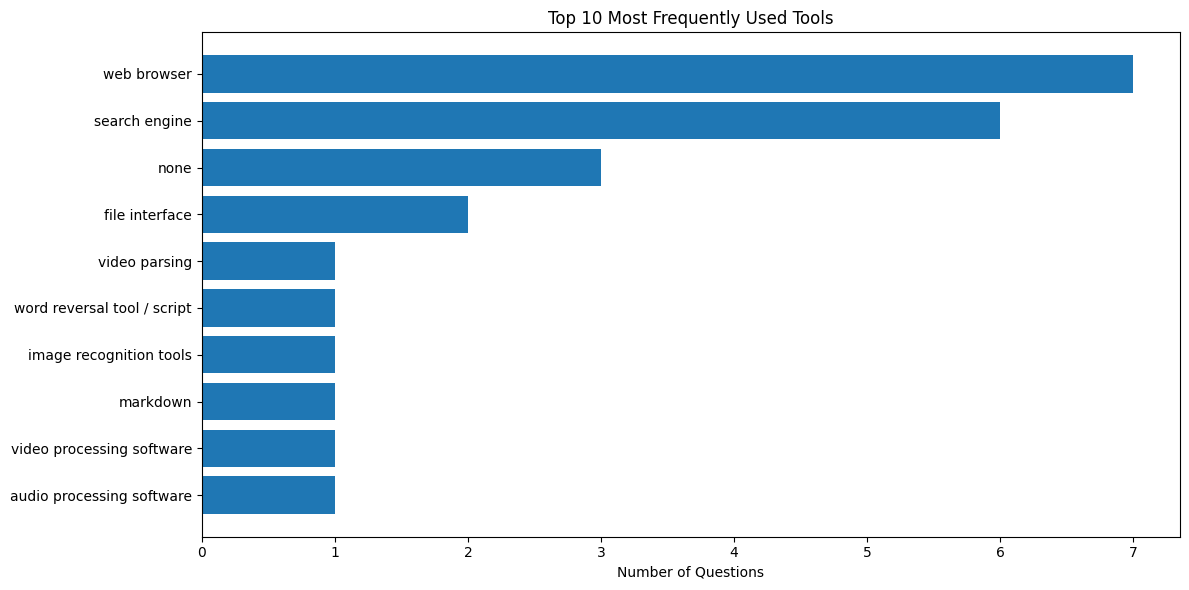

In [24]:
# Tool Usage Analysis
print("🔧 Tool Usage Analysis")
print("=" * 50)

if 'Annotator Metadata' in df_full.columns:
    tool_counts = {}
    total_questions_with_tools = 0
    
    for idx, row in df_full.iterrows():
        if pd.notna(row['Annotator Metadata']) and isinstance(row['Annotator Metadata'], dict):
            tools = row['Annotator Metadata'].get('Tools', '')
            if tools:
                total_questions_with_tools += 1
                # Split by numbered list items and clean up
                tool_lines = [line.strip() for line in tools.split('\n') if line.strip()]
                for line in tool_lines:
                    # Remove numbering (1., 2., etc.)
                    if '. ' in line:
                        tool = line.split('. ', 1)[1] if len(line.split('. ', 1)) > 1 else line
                    else:
                        tool = line
                    
                    # Clean up common variations
                    tool = tool.lower().strip()
                    if tool.startswith('a '):
                        tool = tool[2:]
                    
                    # Normalize common tool names
                    if 'web browser' in tool or 'browser' in tool:
                        tool = 'web browser'
                    elif 'search engine' in tool or 'google' in tool:
                        tool = 'search engine'
                    elif 'calculator' in tool:
                        tool = 'calculator'
                    elif 'excel' in tool or 'spreadsheet' in tool:
                        tool = 'spreadsheet software'
                    elif 'pdf' in tool:
                        tool = 'pdf viewer'
                    elif 'image' in tool and 'recognition' in tool:
                        tool = 'image recognition tools'
                    
                    tool_counts[tool] = tool_counts.get(tool, 0) + 1
    
    print(f"Total questions with tool information: {total_questions_with_tools}")
    print(f"Unique tools identified: {len(tool_counts)}")
    
    # Sort tools by frequency
    sorted_tools = sorted(tool_counts.items(), key=lambda x: x[1], reverse=True)
    
    print("\n📊 Tool usage frequency:")
    for tool, count in sorted_tools:
        percentage = (count / total_questions_with_tools) * 100
        print(f"  {tool}: {count} times ({percentage:.1f}%)")
    
    # Create a simple visualization
    if len(sorted_tools) > 0:
        import matplotlib.pyplot as plt
        
        # Take top 10 tools for visualization
        top_tools = sorted_tools[:10]
        tools, counts = zip(*top_tools)
        
        plt.figure(figsize=(12, 6))
        plt.barh(range(len(tools)), counts)
        plt.yticks(range(len(tools)), tools)
        plt.xlabel('Number of Questions')
        plt.title('Top 10 Most Frequently Used Tools')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("No annotator metadata found for tool analysis")

In [25]:
# Display complete dataset with all information
print("Complete dataset with all metadata:")
display_columns = ['task_id', 'Question', 'Level', 'Final answer', 'file_link'] + \
                 [col for col in df_annotated.columns if col.startswith('annotator_')]

# Clean display
display_df = df_annotated[display_columns].copy()
HTML(display_df.head(10).to_html(escape=False, index=False))

Complete dataset with all metadata:


In [26]:
# Export full dataset
df_annotated.to_csv('complete_questions_dataset.csv', index=False)
print(f"Exported complete dataset to 'complete_questions_dataset.csv'")
print(f"Dataset contains {len(df_annotated)} rows and {len(df_annotated.columns)} columns")

# Show final summary
print("\nFinal column summary:")
for col in df_annotated.columns:
    print(f"  {col}: {df_annotated[col].dtype}")

Exported complete dataset to 'complete_questions_dataset.csv'
Dataset contains 20 rows and 12 columns

Final column summary:
  task_id: object
  Question: object
  Level: int64
  Final answer: object
  file_name: object
  Annotator Metadata: object
  file_link: object
  annotator_Steps: object
  annotator_Number of steps: object
  annotator_How long did this take?: object
  annotator_Tools: object
  annotator_Number of tools: int64
